In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
class Net(nn.Module):
    def __init__(self, dim_in, dim_H1, dim_out, act_fctn):
        super(Net, self).__init__()
        self.Seq1 = nn.Sequential(nn.Linear(dim_in, dim_H1), act_fctn)
        self.Linear1 = nn.Linear(dim_H1, dim_out)
        
    def forward(self, x):
        x = self.Seq1(x)
        x = self.Linear1(x)
        return x

In [29]:
def train_model(model, criterion, trainloader, val_loader, optimizer, epochs):
    results_dict = {'training loss': [], 'validation accuracy': []}
    for epoch in range(epochs):
        epoch_loss = 0
        for x, y in trainloader:
            y_hat = model(x.view(-1, 28 * 28)) # Using MNIST
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()
        results_dict['training loss'].append(epoch_loss)
        
        correct = 0
        for x, y in val_loader.dataset:
            y_hat = model(x.view(-1, 28 * 28))
            _, labels = torch.max(y_hat, 1)
            correct += (labels == y).sum().item()
        accuracy = correct / len(val_loader.dataset)
        results_dict['validation accuracy'].append(accuracy)
    return results_dict

In [6]:
train_data = datasets.MNIST(root='../data', train=True, download=True, transform=transforms.ToTensor())
val_data = datasets.MNIST(root='../data', train=False, download=True, transform=transforms.ToTensor())

Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw


Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw
Processing...


C:\Users\msctb\Downloads\New folder\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [19]:
criterion = nn.CrossEntropyLoss()

In [20]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=30, shuffle=True)
val_loader = DataLoader(val_data, batch_size=30)

In [26]:
model_sig = Net(28 * 28, 100, 10, nn.Sigmoid())
model_tanh = Net(28 * 28, 100, 10, nn.Tanh())
model_relu = Net(28 * 28, 100, 10, nn.ReLU())

In [27]:
opt_sig = optim.SGD(model_sig.parameters(), lr=0.01)
opt_tanh = optim.SGD(model_tanh.parameters(), lr=0.01)
opt_relu = optim.SGD(model_relu.parameters(), lr=0.01)

In [30]:
sig_results = train_model(model_sig, criterion, train_loader, val_loader, opt_sig, 30)

In [32]:
tanh_results = train_model(model_tanh, criterion, train_loader, val_loader, opt_tanh, 30)

In [33]:
relu_results = train_model(model_relu, criterion, train_loader, val_loader, opt_relu, 30)

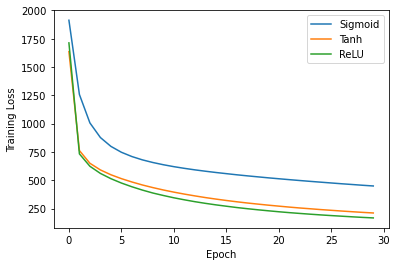

In [34]:
# Compare training loss

plt.plot(sig_results['training loss'], label='Sigmoid')
plt.plot(tanh_results['training loss'], label='Tanh')
plt.plot(relu_results['training loss'], label='ReLU')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

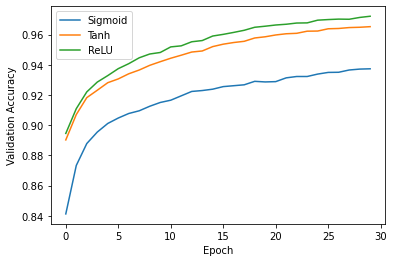

In [35]:
# Compare validation accuracy

plt.plot(sig_results['validation accuracy'], label='Sigmoid')
plt.plot(tanh_results['validation accuracy'], label='Tanh')
plt.plot(relu_results['validation accuracy'], label='ReLU')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()